In [22]:

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

from __future__ import division
import cv2
import numpy as np
import math
import copy

from sklearn import datasets
import pylab as pl

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
mnist.train.images.shape

(55000, 784)

In [24]:
mnist.test.images.shape

(10000, 784)

In [25]:
mnist.validation.images.shape

(5000, 784)

In [26]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [27]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [28]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [29]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [30]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [31]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

In [36]:
# Train
iter = 1
for _ in range(1000):
    #print (iter)
    iter = iter + 1
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [37]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))

0.9157


In [38]:
tx1 = mnist.test.images[142]
ty1 = mnist.test.labels[142]
#print (tx1.shape)
#print (tx1)
#print (ty1)

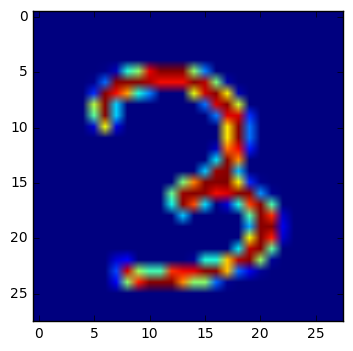

In [39]:
tx12x2 = tf.reshape(tx1,[28,28])
t = tx12x2.eval()
plt.imshow(t)
plt.show()

[3]


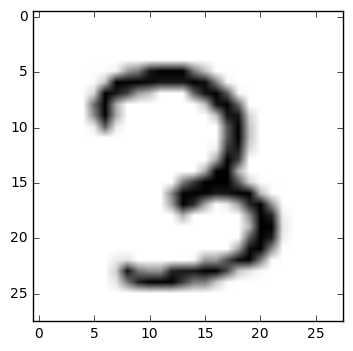

NN predicted 3


In [40]:
classification = sess.run(tf.argmax(y, 1), feed_dict={x: [tx1]})
print(classification)
plt.imshow(tx1.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print ('NN predicted', classification[0])

[2]


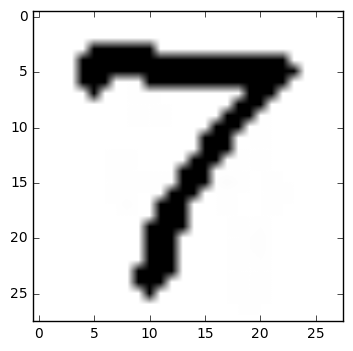

NN predicted 2


In [48]:
from scipy import misc
hand7 = misc.imread('hand_7.png')
plt.imshow(hand7, cmap=plt.cm.gray)
hand7 = cv2.bitwise_not(hand7)
hand7 = hand7.reshape(784)

classification = sess.run(tf.argmax(y, 1), feed_dict={x: [hand7]})
print(classification)
plt.imshow(hand7.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print ('NN predicted', classification[0])